In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS, add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
data = pd.read_csv('Test_data.csv')
# Display the first few rows of the dataset
print(data.head())

   employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0     

In [8]:
data.size

305370

In [9]:
data.shape

(23490, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [11]:
print('Summary Statistics: ')
print(data.describe())

Summary Statistics: 
        employee_id  no_of_trainings           age  previous_year_rating  \
count  23490.000000     23490.000000  23490.000000          21678.000000   
mean   39041.399149         1.254236     34.782929              3.339146   
std    22640.809201         0.600910      7.679492              1.263294   
min        3.000000         1.000000     20.000000              1.000000   
25%    19370.250000         1.000000     29.000000              3.000000   
50%    38963.500000         1.000000     33.000000              3.000000   
75%    58690.000000         1.000000     39.000000              4.000000   
max    78295.000000         9.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  
count       23490.000000   23490.000000  23490.000000        23490.000000  
mean            5.810387       0.358834      0.022776           63.263133  
std             4.207917       0.479668      0.149191           13

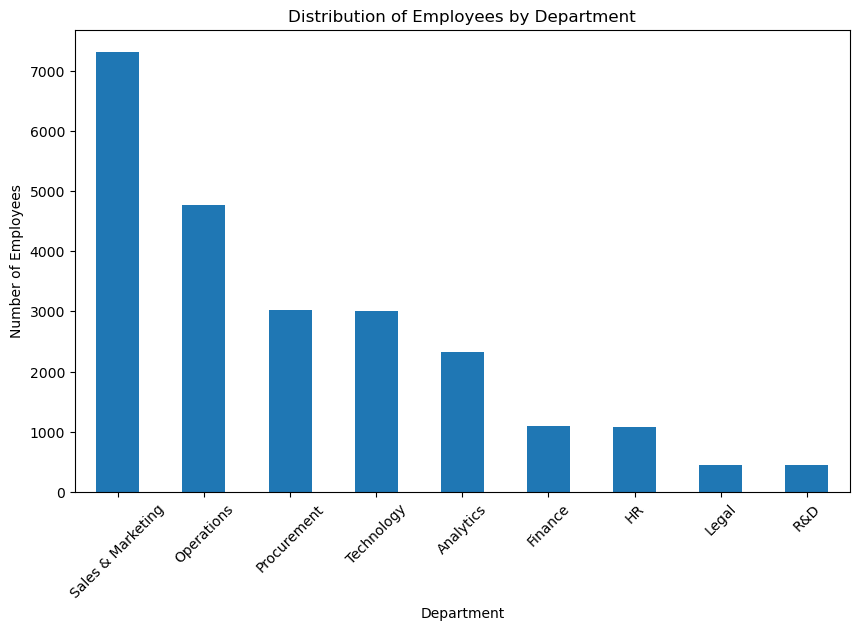

In [12]:
# Distribution of employees by department
department_distribution = data['department'].value_counts()
plt.figure(figsize=(10, 6))
department_distribution.plot(kind='bar')
plt.title('Distribution of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

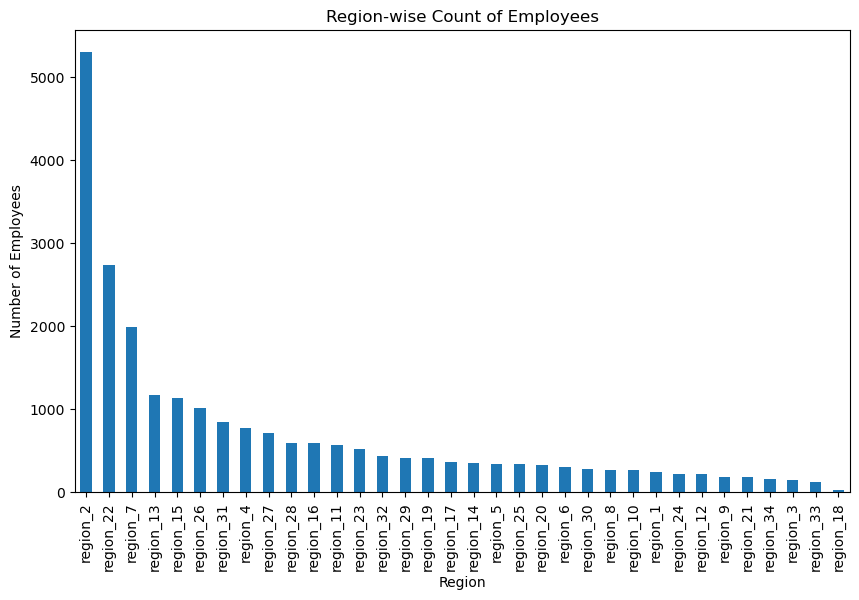

region_2     5299
region_22    2739
region_7     1982
region_13    1167
region_15    1130
region_26    1011
region_31     844
region_4      775
region_27     710
region_28     595
region_16     590
region_11     571
region_23     516
region_32     433
region_29     414
region_19     410
region_17     361
region_14     350
region_5      342
region_25     337
region_20     326
region_6      298
region_30     273
region_8      269
region_10     269
region_1      238
region_24     219
region_12     215
region_9      180
region_21     179
region_34     155
region_3      147
region_33     126
region_18      20
Name: region, dtype: int64


In [14]:
# Region-wise count of employees
region_count = data['region'].value_counts()
# Plot the region-wise count of employees
plt.figure(figsize=(10, 6))
region_count.plot(kind='bar')
plt.title('Region-wise Count of Employees')
plt.xlabel('Region')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.show()
# Display the counts
print(region_count)

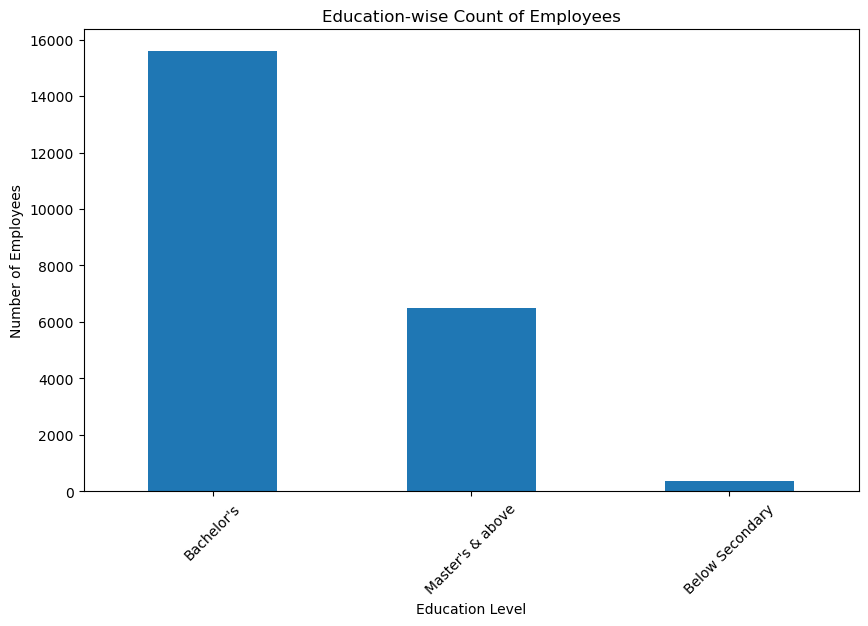

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64


In [15]:
# Education-wise count of employees
education_count = data['education'].value_counts()
# Plot the education-wise count of employees
plt.figure(figsize=(10, 6))
education_count.plot(kind='bar')
plt.title('Education-wise Count of Employees')
plt.xlabel('Education Level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()
# Display the counts
print(education_count)


C:\Users\RAGHAV MAHESHWARI\AppData\Local\Temp\ipykernel_15000\1282109882.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


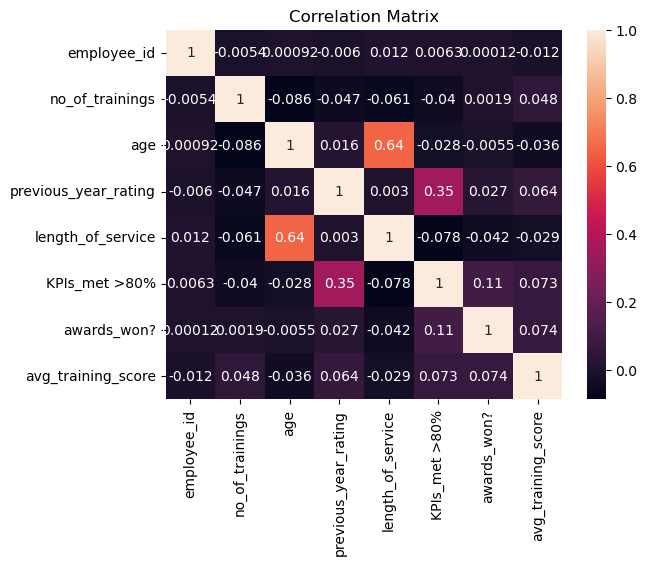

In [16]:
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

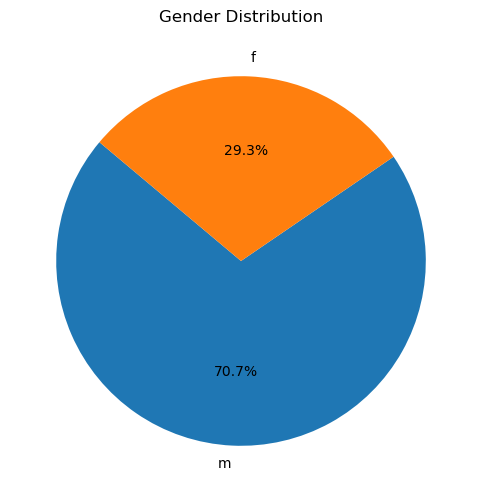

In [20]:
# Gender distribution
gender_distribution = data['gender'].value_counts()

plt.figure(figsize=(6, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

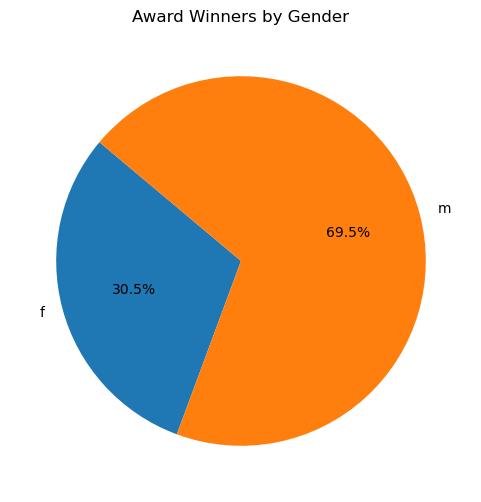

In [17]:
# Award Winners by Gender
awards_by_gender = data.groupby('gender')['awards_won?'].sum()
plt.figure(figsize=(6, 6))
awards_by_gender.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Award Winners by Gender')
plt.ylabel('')
plt.show()

<Figure size 1200x800 with 0 Axes>

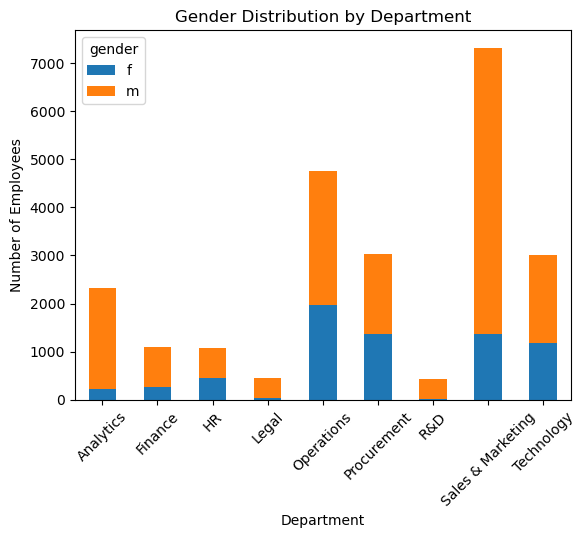

In [18]:
# Gender Distribution by Department
gender_by_department = data.groupby(['department', 'gender']).size().unstack()
plt.figure(figsize=(12, 8))
gender_by_department.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


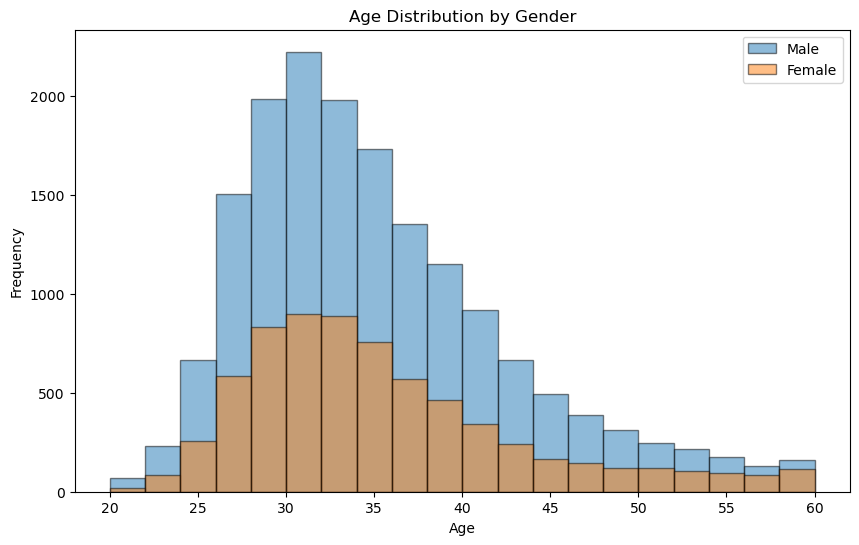

In [19]:
# Age Distribution by Gender
plt.figure(figsize=(10, 6))
data[data['gender'] == 'm']['age'].plot(kind='hist', bins=20, alpha=0.5, label='Male', edgecolor='black')
data[data['gender'] == 'f']['age'].plot(kind='hist', bins=20, alpha=0.5, label='Female', edgecolor='black')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


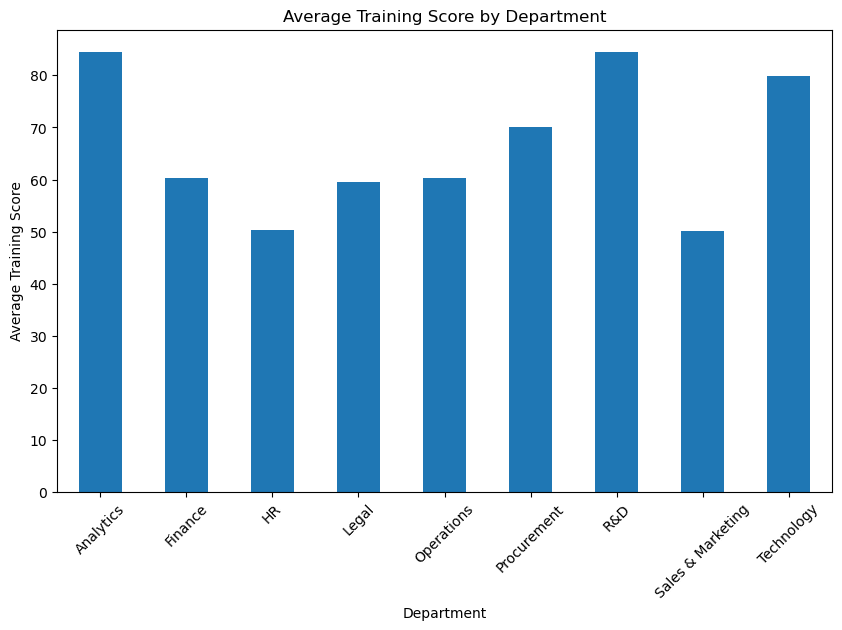

In [5]:
# Average training score by department
avg_training_score_by_department = data.groupby('department')['avg_training_score'].mean()

plt.figure(figsize=(10, 6))
avg_training_score_by_department.plot(kind='bar')
plt.title('Average Training Score by Department')
plt.xlabel('Department')
plt.ylabel('Average Training Score')
plt.xticks(rotation=45)
plt.show()


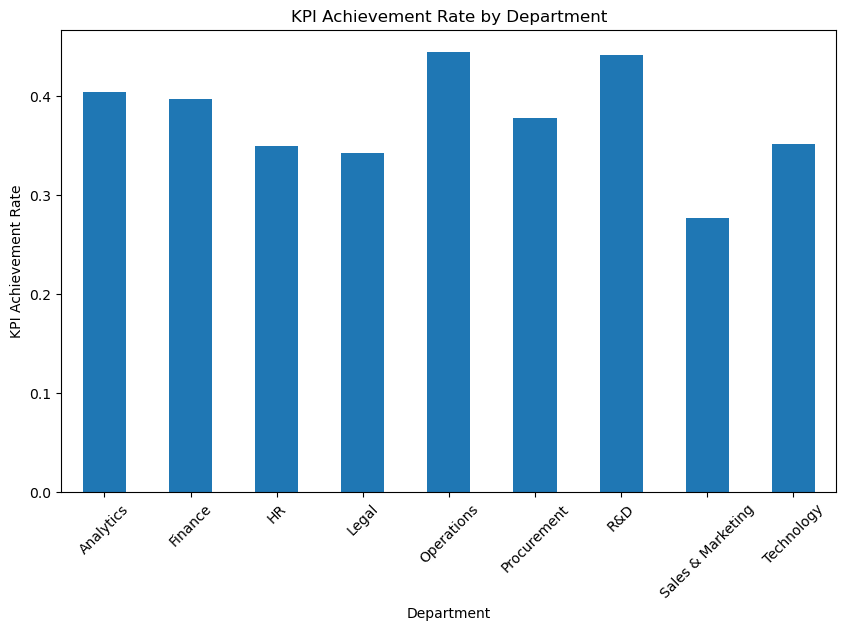

In [21]:
# KPI Achievement Rate by Department
kpi_by_department = data.groupby('department')['KPIs_met >80%'].mean()

plt.figure(figsize=(10, 6))
kpi_by_department.plot(kind='bar')
plt.title('KPI Achievement Rate by Department')
plt.xlabel('Department')
plt.ylabel('KPI Achievement Rate')
plt.xticks(rotation=45)
plt.show()

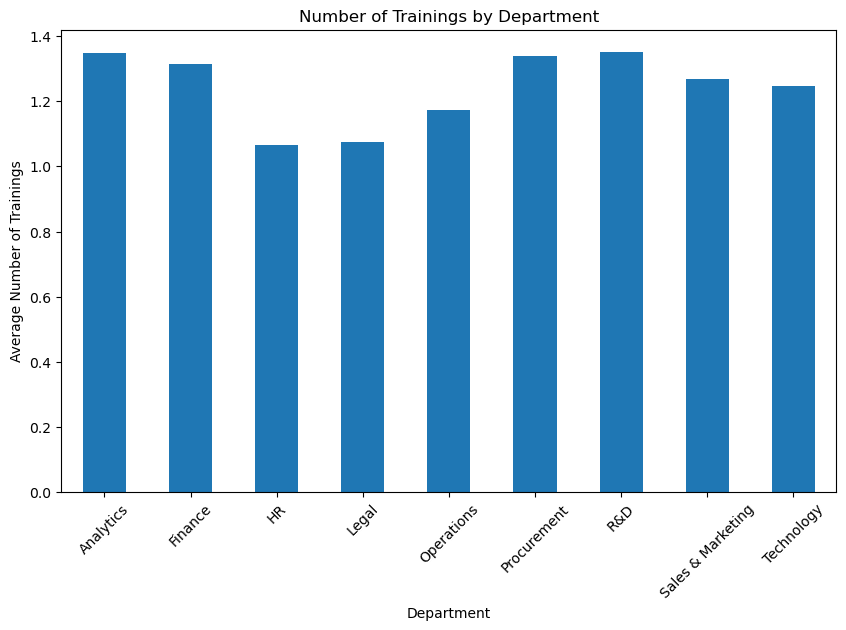

In [22]:
# Number of Trainings by Department
trainings_by_department = data.groupby('department')['no_of_trainings'].mean()

plt.figure(figsize=(10, 6))
trainings_by_department.plot(kind='bar')
plt.title('Number of Trainings by Department')
plt.xlabel('Department')
plt.ylabel('Average Number of Trainings')
plt.xticks(rotation=45)
plt.show()

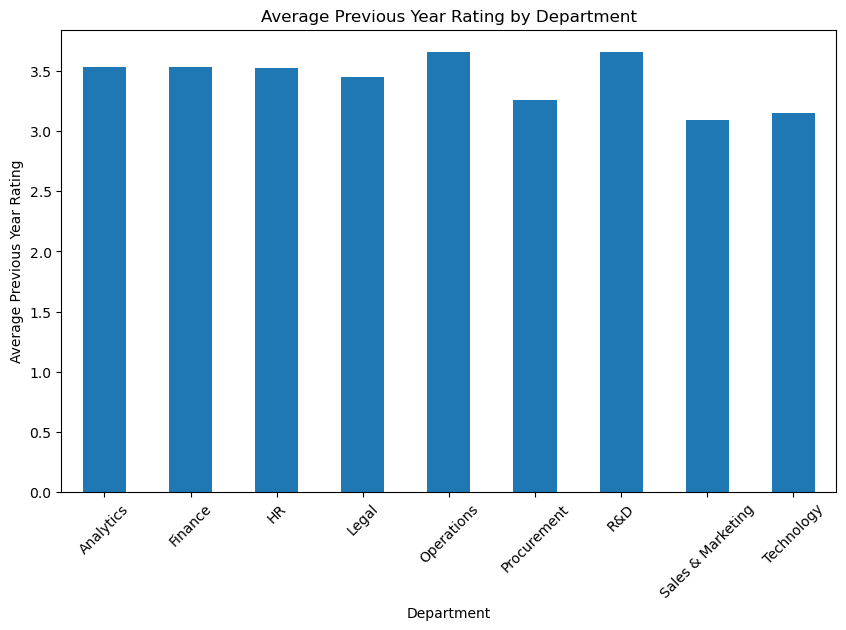

In [23]:
# Average Previous Year Rating by Department
avg_rating_by_department = data.groupby('department')['previous_year_rating'].mean()

plt.figure(figsize=(10, 6))
avg_rating_by_department.plot(kind='bar')
plt.title('Average Previous Year Rating by Department')
plt.xlabel('Department')
plt.ylabel('Average Previous Year Rating')
plt.xticks(rotation=45)
plt.show()


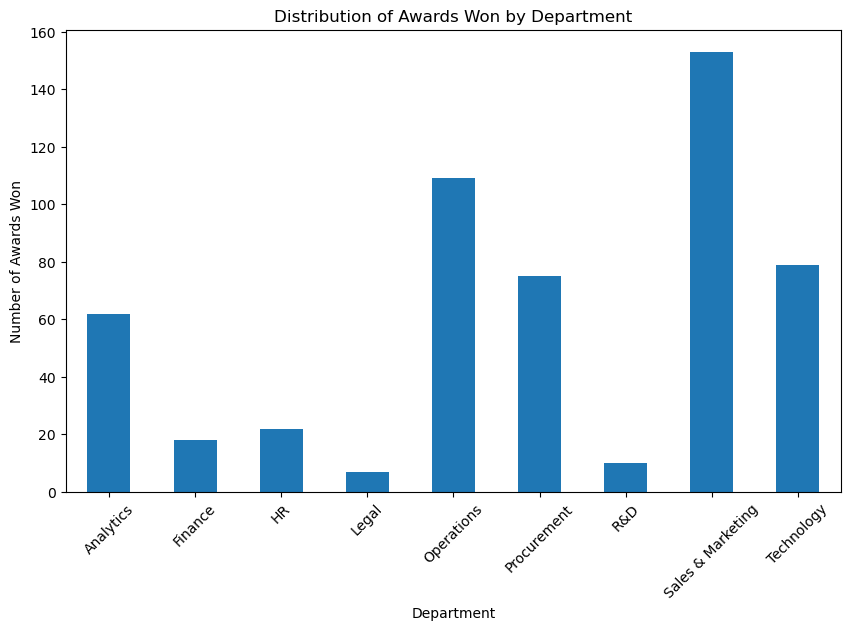

In [24]:
# Distribution of Awards Won by Department
awards_by_department = data.groupby('department')['awards_won?'].sum()

plt.figure(figsize=(10, 6))
awards_by_department.plot(kind='bar')
plt.title('Distribution of Awards Won by Department')
plt.xlabel('Department')
plt.ylabel('Number of Awards Won')
plt.xticks(rotation=45)
plt.show()


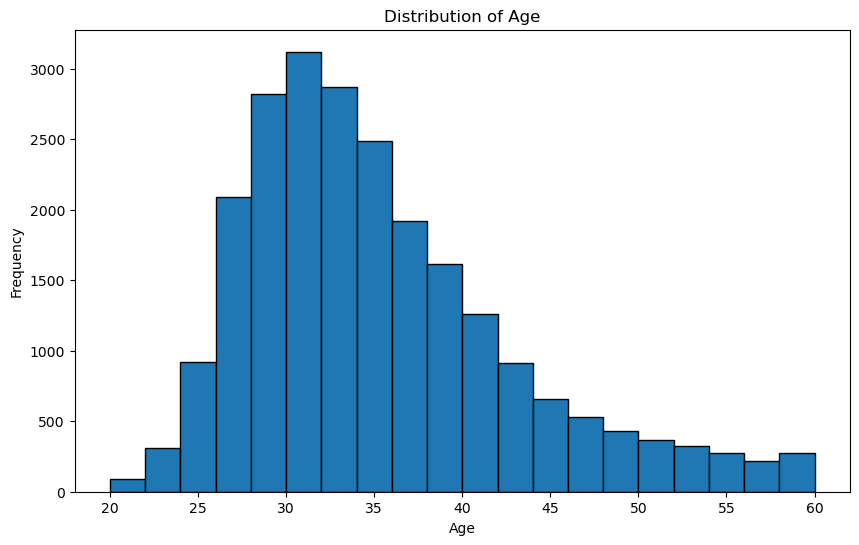

In [26]:
# Distribution of Age
plt.figure(figsize=(10, 6))
data['age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


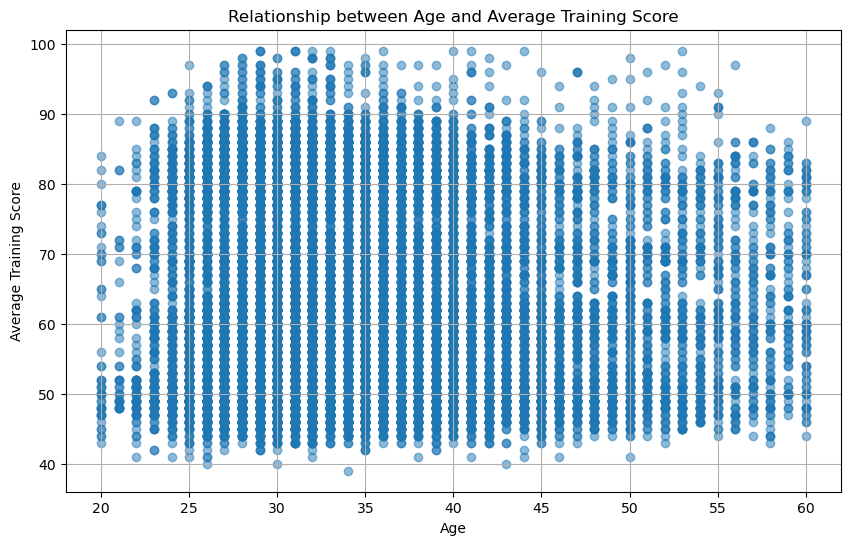

In [27]:
# Relationship between Age and Average Training Score
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['avg_training_score'], alpha=0.5)
plt.title('Relationship between Age and Average Training Score')
plt.xlabel('Age')
plt.ylabel('Average Training Score')
plt.grid(True)
plt.show()


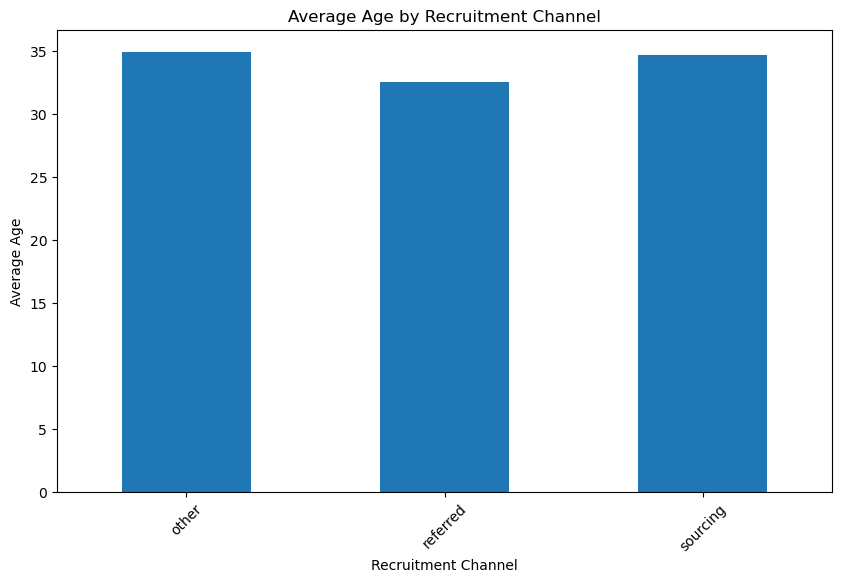

In [28]:
# Average Age by Recruitment Channel
avg_age_by_channel = data.groupby('recruitment_channel')['age'].mean()

plt.figure(figsize=(10, 6))
avg_age_by_channel.plot(kind='bar')
plt.title('Average Age by Recruitment Channel')
plt.xlabel('Recruitment Channel')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()


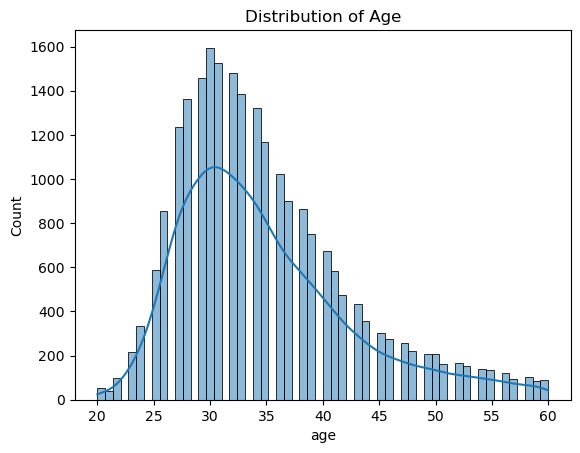

In [29]:
sns.histplot(data['age'], kde=True)
plt.title("Distribution of Age")
plt.show()

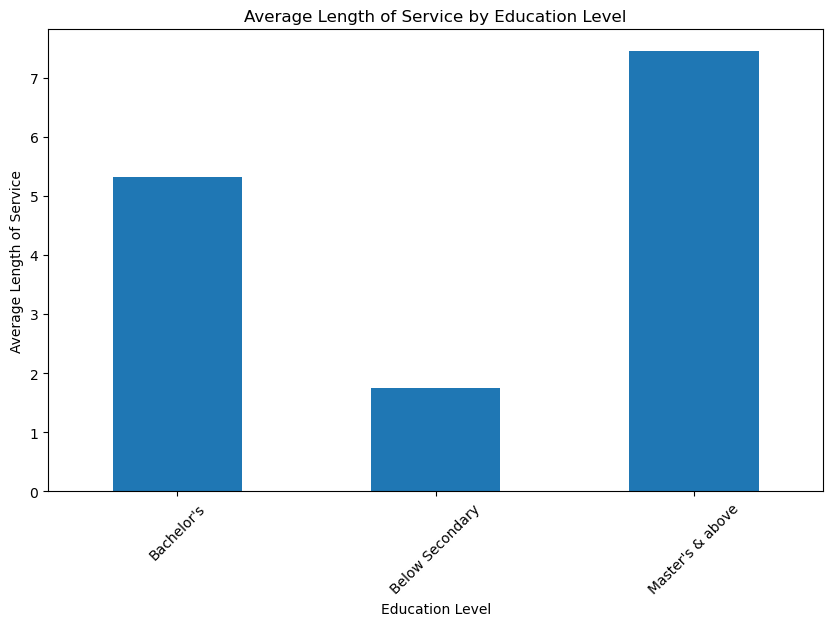

In [8]:
# Average length of service by education level
avg_length_of_service_by_education = data.groupby('education')['length_of_service'].mean()

plt.figure(figsize=(10, 6))
avg_length_of_service_by_education.plot(kind='bar')
plt.title('Average Length of Service by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Length of Service')
plt.xticks(rotation=45)
plt.show()


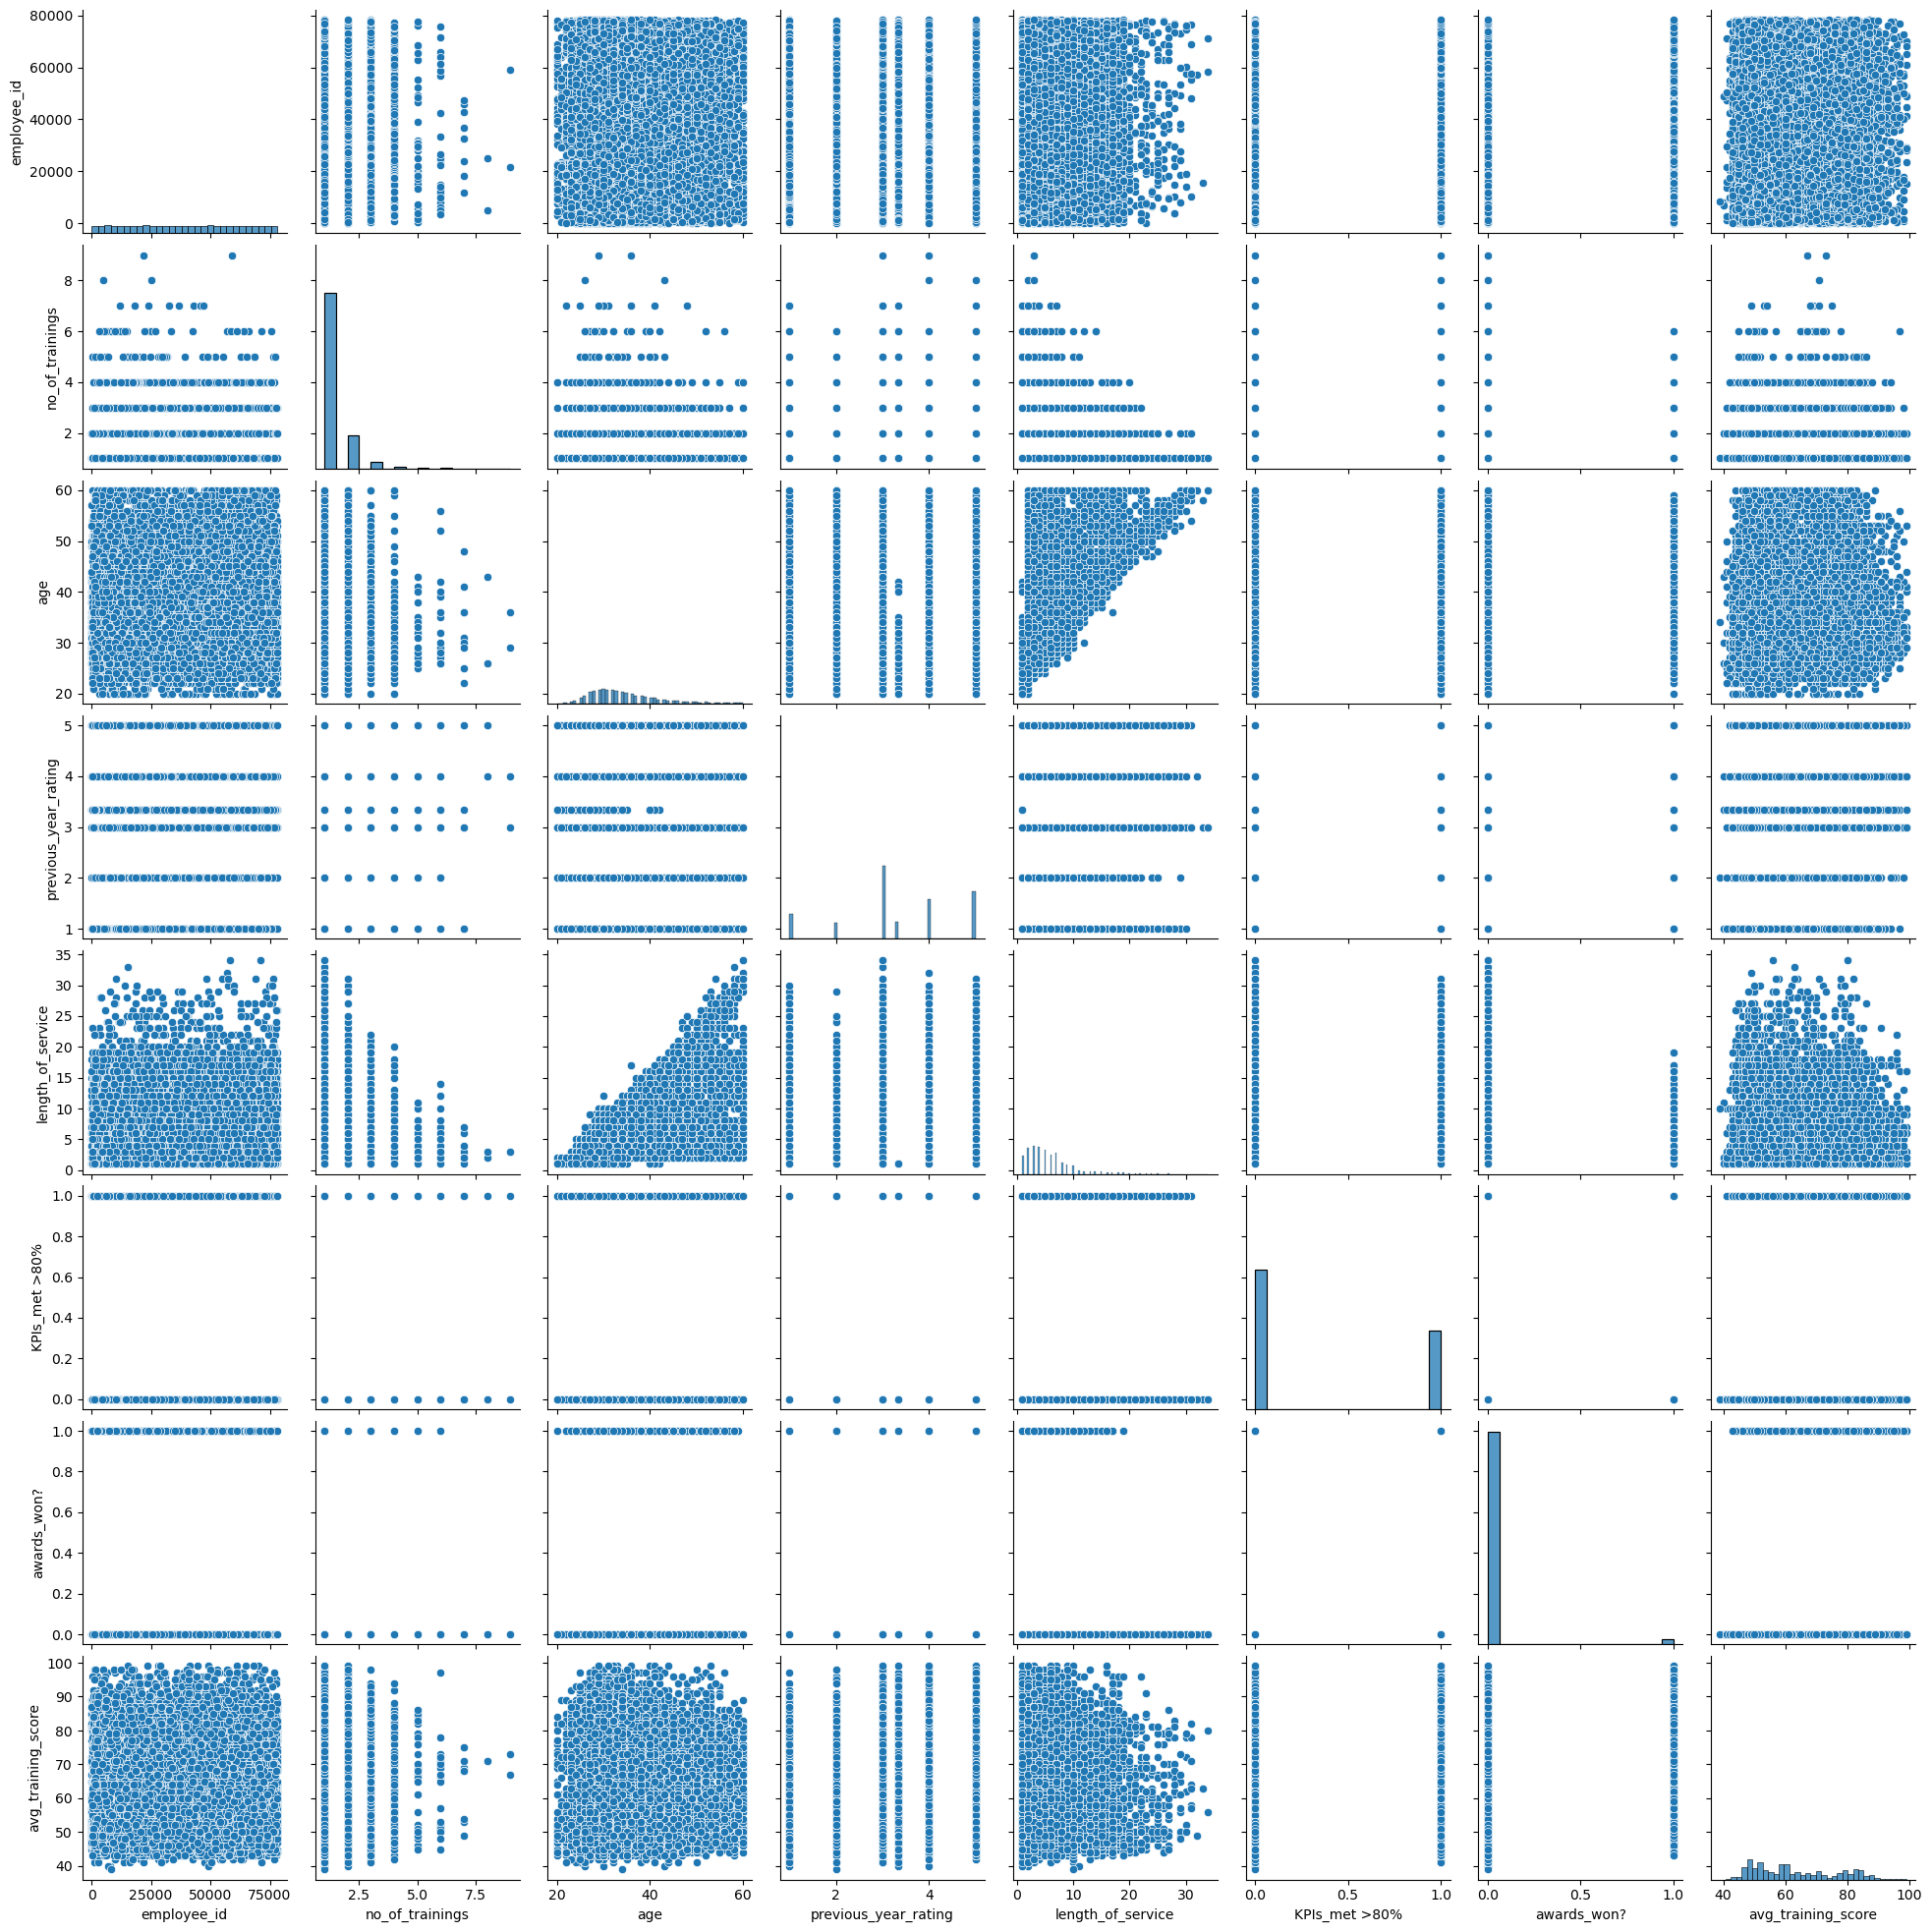

In [13]:
sns.pairplot(data)
plt.show()


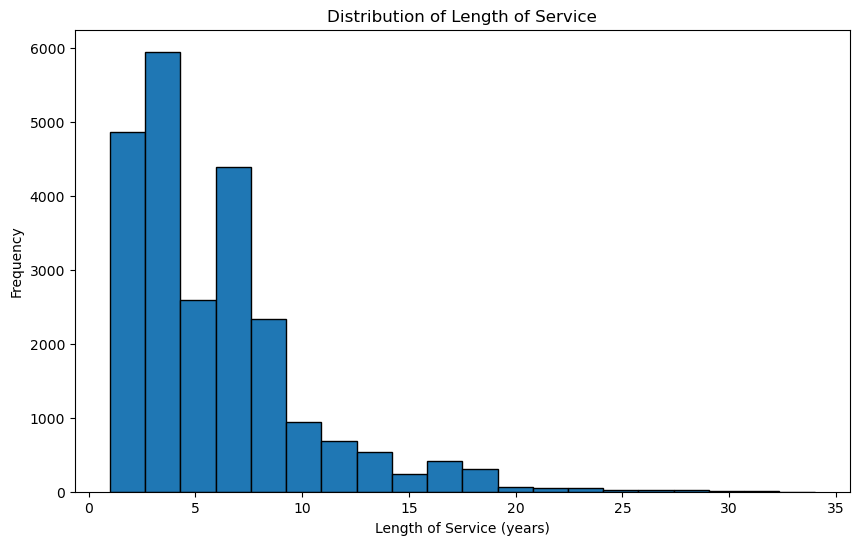

In [15]:
# Distribution of Length of Service
plt.figure(figsize=(10, 6))
data['length_of_service'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Length of Service')
plt.xlabel('Length of Service (years)')
plt.ylabel('Frequency')
plt.show()


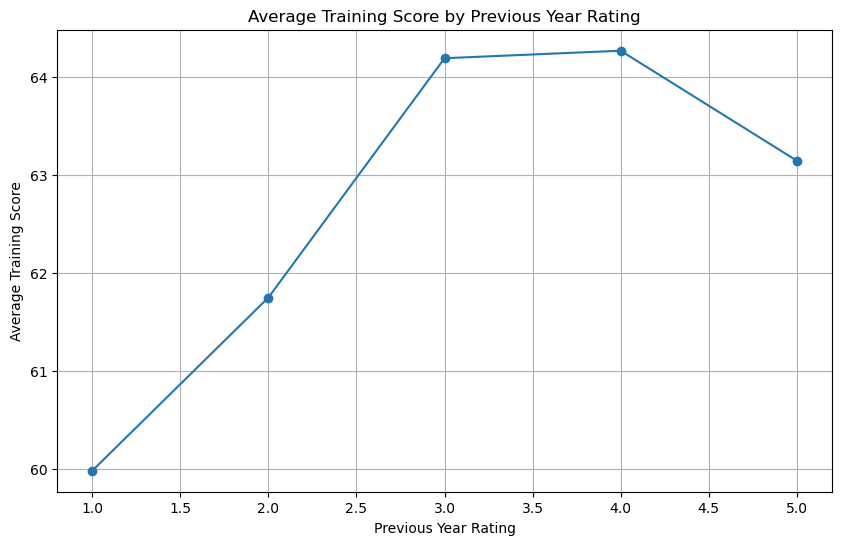

In [30]:
# Average Training Score by Previous Year Rating
avg_score_by_rating = data.groupby('previous_year_rating')['avg_training_score'].mean()

plt.figure(figsize=(10, 6))
avg_score_by_rating.plot(kind='line', marker='o')
plt.title('Average Training Score by Previous Year Rating')
plt.xlabel('Previous Year Rating')
plt.ylabel('Average Training Score')
plt.grid(True)
plt.show()


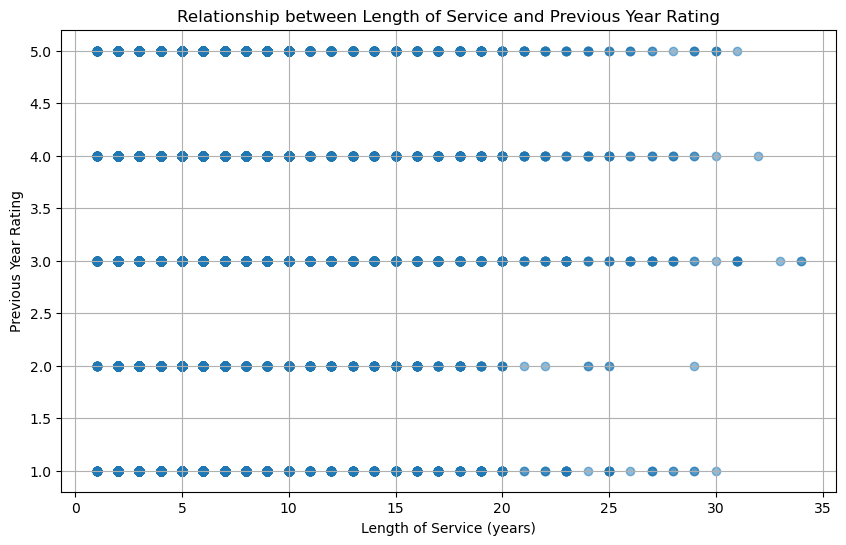

In [31]:
# Relationship between Length of Service and Previous Year Rating
plt.figure(figsize=(10, 6))
plt.scatter(data['length_of_service'], data['previous_year_rating'], alpha=0.5)
plt.title('Relationship between Length of Service and Previous Year Rating')
plt.xlabel('Length of Service (years)')
plt.ylabel('Previous Year Rating')
plt.grid(True)
plt.show()


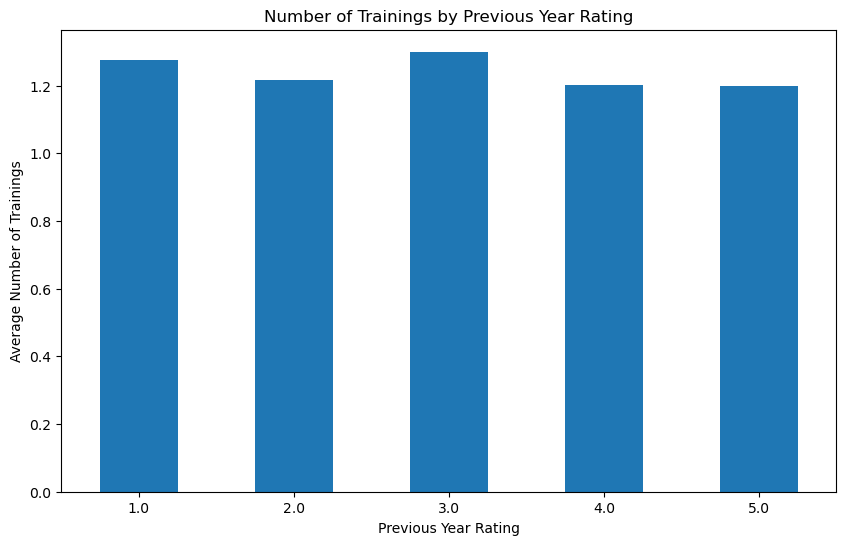

In [34]:
# Number of Trainings by Previous Year Rating
trainings_by_rating = data.groupby('previous_year_rating')['no_of_trainings'].mean()

plt.figure(figsize=(10, 6))
trainings_by_rating.plot(kind='bar')
plt.title('Number of Trainings by Previous Year Rating')
plt.xlabel('Previous Year Rating')
plt.ylabel('Average Number of Trainings')
plt.xticks(rotation=0)
plt.show()


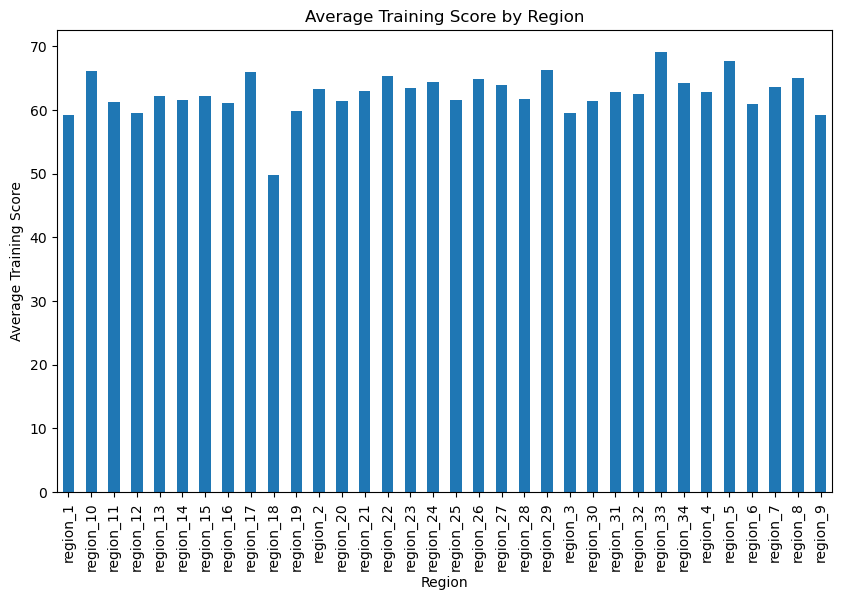

In [35]:
# Average Training Score by Region
avg_score_by_region = data.groupby('region')['avg_training_score'].mean()

plt.figure(figsize=(10, 6))
avg_score_by_region.plot(kind='bar')
plt.title('Average Training Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Training Score')
plt.xticks(rotation=90)
plt.show()


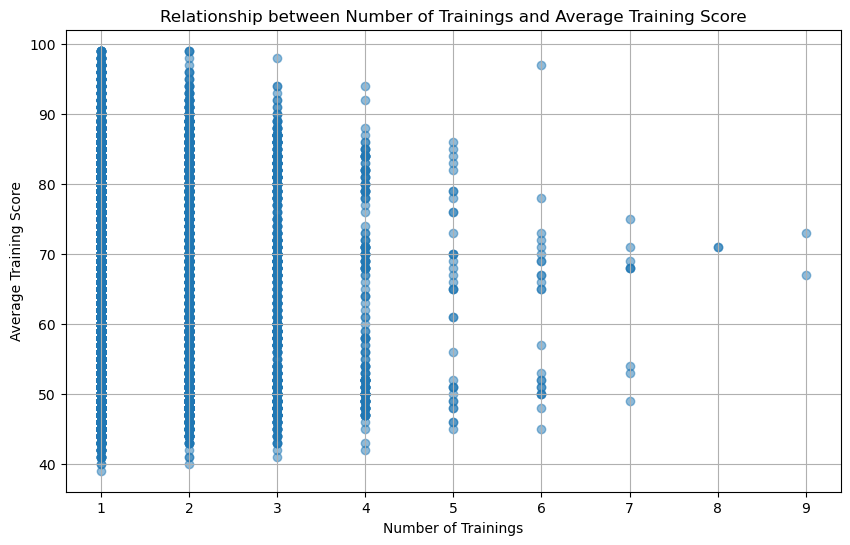

In [36]:
# Relationship between Number of Trainings and Average Training Score
plt.figure(figsize=(10, 6))
plt.scatter(data['no_of_trainings'], data['avg_training_score'], alpha=0.5)
plt.title('Relationship between Number of Trainings and Average Training Score')
plt.xlabel('Number of Trainings')
plt.ylabel('Average Training Score')
plt.grid(True)
plt.show()


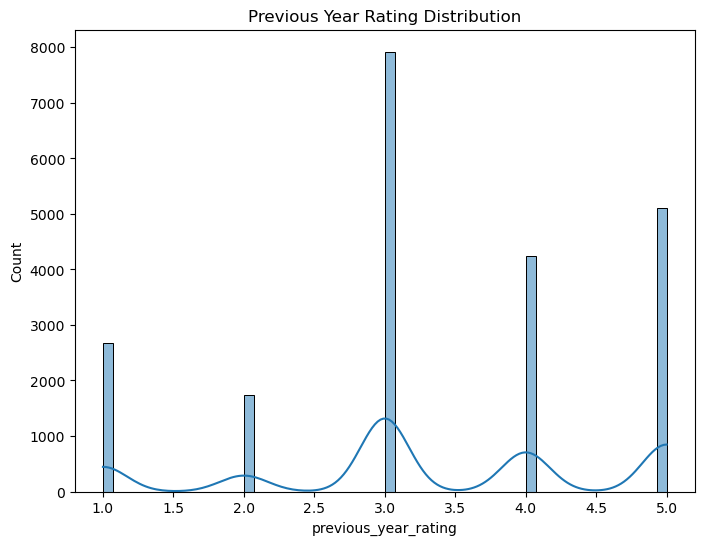

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(data['previous_year_rating'], kde=True)
plt.title('Previous Year Rating Distribution')
plt.show()

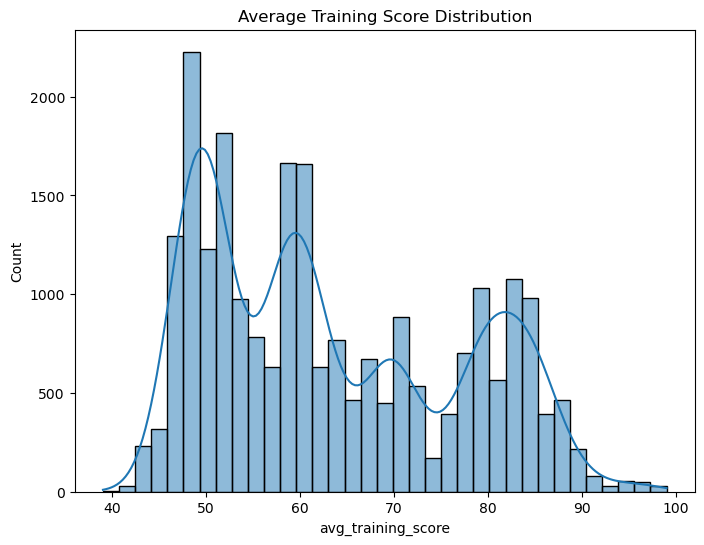

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(data['avg_training_score'], kde=True)
plt.title('Average Training Score Distribution')
plt.show()

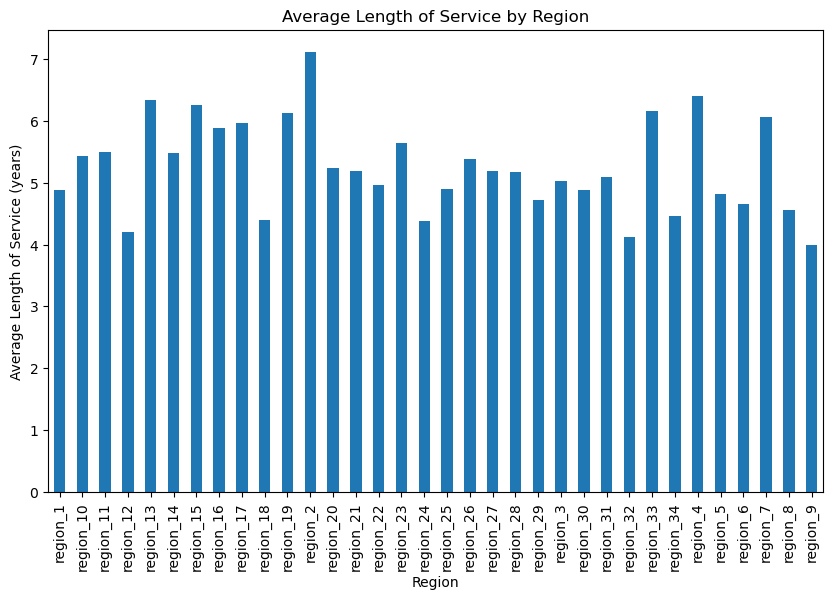

In [39]:
# Length of Service by Region
service_by_region = data.groupby('region')['length_of_service'].mean()

plt.figure(figsize=(10, 6))
service_by_region.plot(kind='bar')
plt.title('Average Length of Service by Region')
plt.xlabel('Region')
plt.ylabel('Average Length of Service (years)')
plt.xticks(rotation=90)
plt.show()


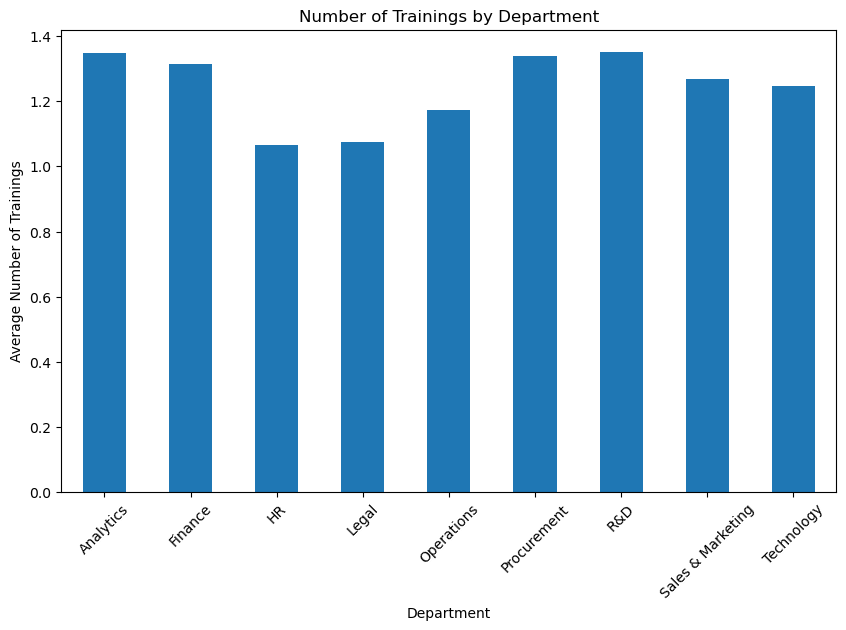

In [17]:
# Number of Trainings by Department
trainings_by_department = data.groupby('department')['no_of_trainings'].mean()

plt.figure(figsize=(10, 6))
trainings_by_department.plot(kind='bar')
plt.title('Number of Trainings by Department')
plt.xlabel('Department')
plt.ylabel('Average Number of Trainings')
plt.xticks(rotation=45)
plt.show()


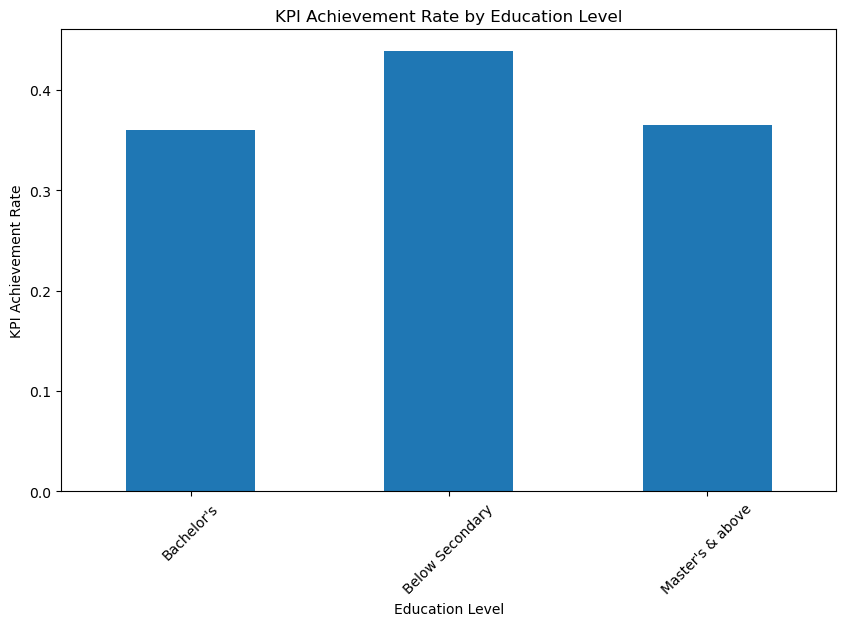

In [40]:
# KPI Achievement Rate by Education Level
kpi_by_education = data.groupby('education')['KPIs_met >80%'].mean()

plt.figure(figsize=(10, 6))
kpi_by_education.plot(kind='bar')
plt.title('KPI Achievement Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('KPI Achievement Rate')
plt.xticks(rotation=45)
plt.show()


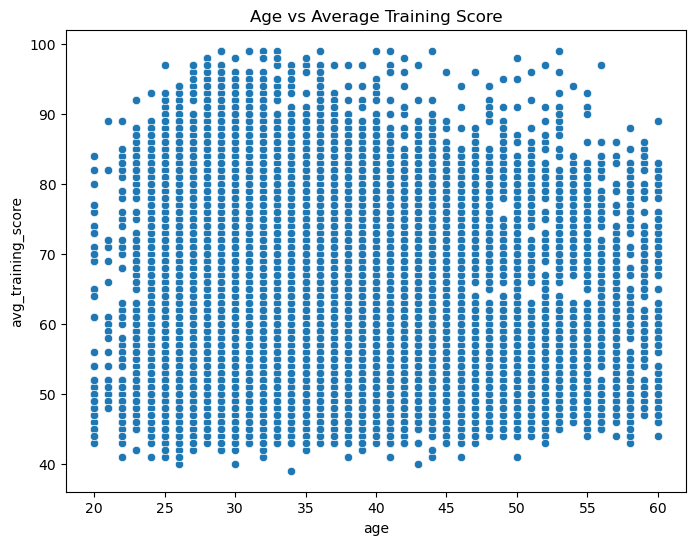

In [41]:
# Age vs Average Training Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='avg_training_score', data=data)
plt.title('Age vs Average Training Score')
plt.show()

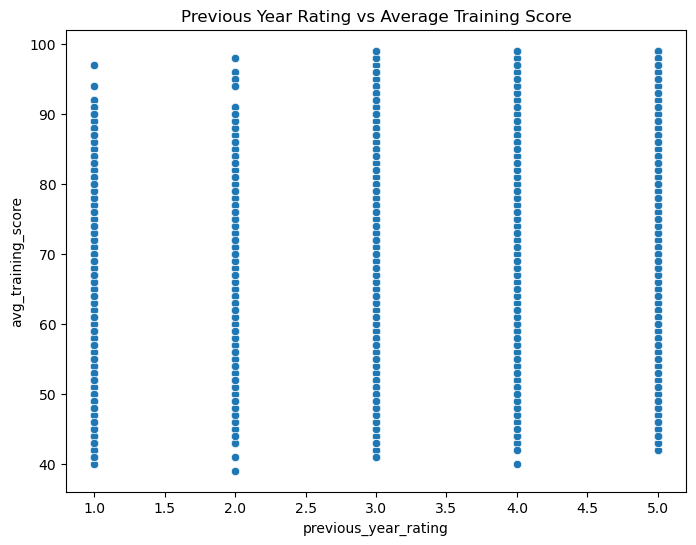

In [42]:
# Previous Year Rating vs Average Training Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='previous_year_rating', y='avg_training_score', data=data)
plt.title('Previous Year Rating vs Average Training Score')
plt.show()

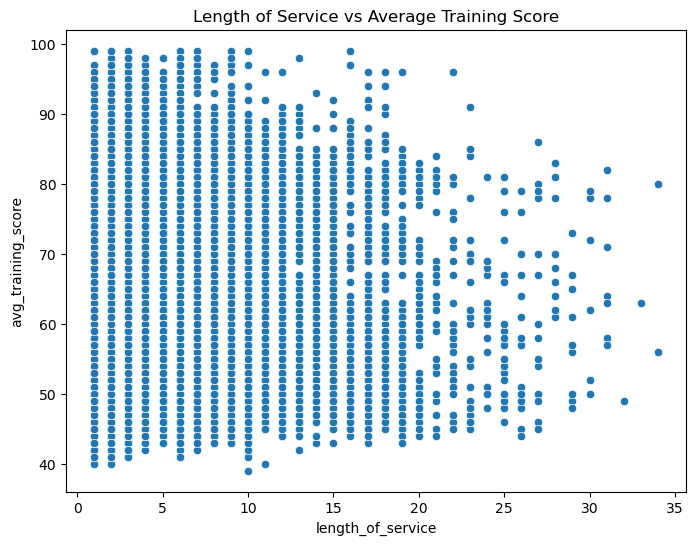

In [43]:
# Length of Service vs Average Training Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='length_of_service', y='avg_training_score', data=data)
plt.title('Length of Service vs Average Training Score')
plt.show()

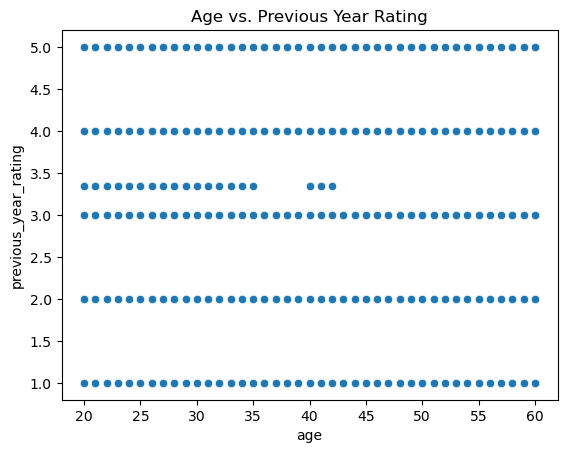

In [26]:
sns.scatterplot(x='age', y='previous_year_rating', data=data)
plt.title("Age vs. Previous Year Rating")
plt.show()

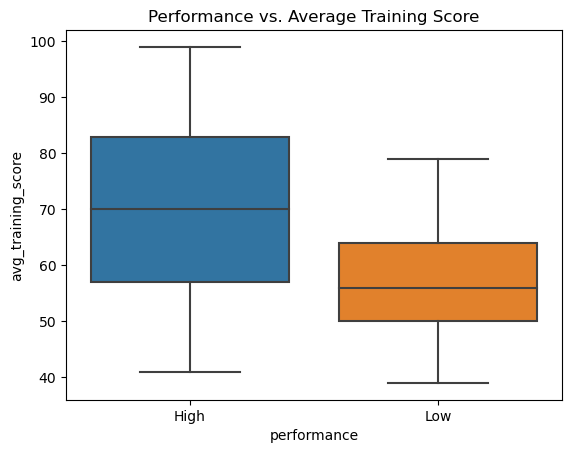

In [27]:
sns.boxplot(x='performance', y='avg_training_score', data=data)
plt.title("Performance vs. Average Training Score")
plt.show()

In [29]:
print("\nEmployee Performance by Department:")
print(data.groupby('department')['performance'].value_counts())



Employee Performance by Department:
department         performance
Analytics          High           2283
                   Low              36
Finance            Low             655
                   High            436
HR                 Low             704
                   High            381
Legal              Low             292
                   High            153
Operations         Low            2627
                   High           2137
Procurement        Low            1803
                   High           1217
R&D                High            432
                   Low               8
Sales & Marketing  Low            5279
                   High           2036
Technology         High           2063
                   Low             948
Name: performance, dtype: int64


In [30]:
print("\nAverage Age of Employees by Region:")
print(data.groupby('region')['age'].mean())


Average Age of Employees by Region:
region
region_1     32.008403
region_10    33.687732
region_11    33.451839
region_12    30.967442
region_13    35.646958
region_14    34.137143
region_15    35.440708
region_16    34.162712
region_17    35.778393
region_18    31.200000
region_19    35.680488
region_2     38.754671
region_20    32.886503
region_21    33.558659
region_22    32.324571
region_23    34.416667
region_24    31.068493
region_25    32.183976
region_26    33.734916
region_27    32.888732
region_28    32.650420
region_29    31.615942
region_3     33.306122
region_30    32.512821
region_31    32.866114
region_32    30.808314
region_33    36.277778
region_34    30.729032
region_4     36.331613
region_5     32.751462
region_6     30.969799
region_7     35.301715
region_8     31.840149
region_9     29.877778
Name: age, dtype: float64


In [31]:
print("\nAverage Training Score by Recruitment Channel:")
print(data.groupby('recruitment_channel')['avg_training_score'].mean())


Average Training Score by Recruitment Channel:
recruitment_channel
other       63.448769
referred    65.088692
sourcing    62.936753
Name: avg_training_score, dtype: float64


In [38]:
print("\nCorrelation Analysis:")
print(data.corr())



Correlation Analysis:
                      employee_id  no_of_trainings       age  \
employee_id              1.000000        -0.005433  0.000920   
no_of_trainings         -0.005433         1.000000 -0.085509   
age                      0.000920        -0.085509  1.000000   
previous_year_rating    -0.005963        -0.047348  0.016421   
length_of_service        0.011781        -0.061095  0.644515   
KPIs_met >80%            0.006285        -0.040020 -0.027661   
awards_won?              0.000118         0.001892 -0.005457   
avg_training_score      -0.011735         0.048121 -0.035823   

                      previous_year_rating  length_of_service  KPIs_met >80%  \
employee_id                      -0.005963           0.011781       0.006285   
no_of_trainings                  -0.047348          -0.061095      -0.040020   
age                               0.016421           0.644515      -0.027661   
previous_year_rating              1.000000           0.003047       0.349350   


C:\Users\RAGHAV MAHESHWARI\AppData\Local\Temp\ipykernel_11888\2190216396.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


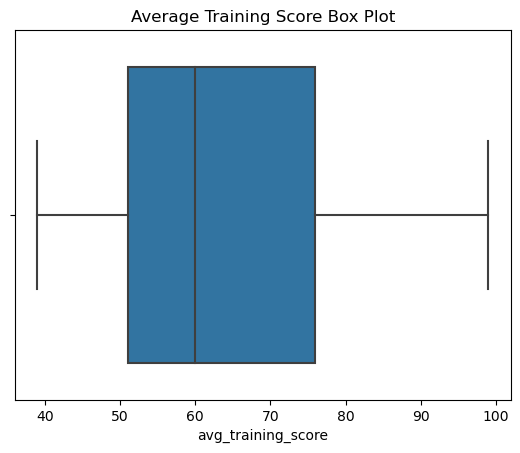

In [45]:
sns.boxplot(x='avg_training_score', data=data)
plt.title('Average Training Score Box Plot')
plt.show()